In [1]:
import os
import numpy as np
import json
import time
from sklearn.metrics import pairwise

In [2]:
def scale_transform_normalize(coords):
    """
    Parameters:
    coords (ndarray): array of (x,y,c) coordinates

    Returns:
    ndarray: coords scaled to 1x1 with center at (0,0)
    ndarray: confidence scores of each joint
    """
    coords, scores = coords[:,:,:-1], coords[:,:,-1]
    diff = coords.max(axis=1) - coords.min(axis=1)
    diff_max = np.max(diff, axis=0)
    mean = coords.mean(axis=1).reshape(coords.shape[0],1,coords.shape[-1])
    out = (coords - mean) / diff_max
    
    return out, scores

In [ ]:
json_dir='/content/drive/MyDrive/posedetection/selected_frame_5/'
final_data=np.array([])
filenames=[]
for filename in os.listdir(json_dir):
  filenames.append([filename][0][:-15])
  print(filename)

  f = open(json_dir+filename,)
  data = json.load(f)
  keypoints=list(data.items())[1][1][0]['pose_keypoints_2d']
  image_keypoints=[]
  # image_keypoints=np.append(image_keypoints,np.array([filename][0][:-15]))
  
  for keys in range(0,len(keypoints),3):
    image_keypoints.append(np.array([keypoints[keys],keypoints[keys+1],keypoints[keys+2]]))
  final_data=np.append(final_data,image_keypoints)


  f.close()
# final_data=final_data.reshape(15,36)

startingpose_keypoints.json
movingforward_keypoints.json
movingbackward_keypoints.json
endingpose_keypoints.json
completesquat_keypoints.json


In [ ]:
poses=final_data.reshape(5,18,3)
poses, scores = scale_transform_normalize(poses)
poses /= np.linalg.norm(poses, axis=2)[:, :, np.newaxis]


poses = poses.reshape((poses.shape[0], -1))

In [ ]:
poses.shape

(5, 36)

In [3]:
json_file='/content/drive/MyDrive/posedetection/keypoints_from_videos_json/squat/squat_000000000170_keypoints.json'
final_data=np.array([])

f = open(json_file,)
data = json.load(f)
keypoints=list(data.items())[1][1][0]['pose_keypoints_2d']
image_keypoints=[]
# image_keypoints=np.append(image_keypoints,np.array([filename][0][:-15]))
  
for keys in range(0,len(keypoints),3):
  image_keypoints.append(np.array([keypoints[keys],keypoints[keys+1],keypoints[keys+2]]))
final_data=np.append(final_data,image_keypoints)

f.close()

pose=final_data.reshape(1,18,3)
pose, scores = scale_transform_normalize(pose)
pose /= np.linalg.norm(pose, axis=2)[:, :, np.newaxis]
pose = pose.reshape((pose.shape[0], -1))


In [4]:
pose

array([[ 0.42134595, -0.90689999,  0.14861914, -0.98889451, -0.40648565,
        -0.91365716,  0.82140968, -0.57033861,  0.90557008, -0.4241967 ,
         0.60402067, -0.79696865,  0.82196325, -0.56954053,  0.89967446,
        -0.4365614 , -0.45233011,  0.89185059,  0.02522656,  0.99968176,
        -0.07647949,  0.99707115, -0.18049225,  0.98357641,  0.36336528,
         0.93164675,  0.07533918,  0.99715797,  0.32525328, -0.94562694,
         0.36292049, -0.93182011,  0.08119588, -0.99669816, -0.82425646,
        -0.56621664]])

In [ ]:
pose_score_list=pairwise.cosine_similarity(user_pose,poses)[0]
pose_score=(np.argmax(pose_score_list),pose_score_list[np.argmax(pose_score_list)])
if pose_score[0]==0:
  print('startingpose',pose_score[1])
if pose_score[0]==1:
  print('movingforward',pose_score[1])
if pose_score[0]==2:
  print('movingbackward',pose_score[1])
if pose_score[0]==3:
  print('endingpose',pose_score[1])
if pose_score[0]==4:
  print('completesquat',pose_score[1])


movingforward 0.8140502669265427


In [5]:
user_json_dir='/content/drive/MyDrive/posedetection/keypoints_from_videos_json/squat/'
start=time.time()
video_frames=[]
activity_progress=set()
activity_counter=0
dump_var=[]
for video_frame in os.listdir(user_json_dir):
  # print(video_frame[:-15])
  res_data=np.array([])
  video_frames.append([video_frame][0][:-15])
  f = open(user_json_dir+video_frame,)
  data = json.load(f)
  keypoints=list(data.items())[1][1][0]['pose_keypoints_2d']
  image_keypoints=[]
  # image_keypoints=np.append(image_keypoints,np.array([filename][0][:-15]))
  
  for keys in range(0,len(keypoints),3):
    image_keypoints.append(np.array([keypoints[keys],keypoints[keys+1],keypoints[keys+2]]))
  res_data=np.append(res_data,image_keypoints)
  f.close()
  
  user_pose=res_data.reshape(1,18,3)
  user_pose, scores = scale_transform_normalize(user_pose)
  user_pose /= np.linalg.norm(user_pose, axis=2)[:, :, np.newaxis]
  user_pose = user_pose.reshape((user_pose.shape[0], -1))

  # if pose_score_list[]
  pose_score_list=pairwise.cosine_similarity(user_pose,pose)[0]
  print(pose_score_list)

  # pose_score=(np.argmax(pose_score_list),pose_score_list[np.argmax(pose_score_list)])
  # # dump_var.append(pose_score_list[np.argmax(pose_score_list)])
  
  # # activity_progress.add(pose_score[0])
  

  # if pose_score[0]==0:
  #   print('startingpose',pose_score[1])
  # if pose_score[0]==1:
  #   print('movingforward',pose_score[1])
  # if pose_score[0]==2:
  #   print('movingbackward',pose_score[1])
  # if pose_score[0]==3:
  #   print('endingpose',pose_score[1])
  # if pose_score[0]==4:
  #   print('completesquat',pose_score[1])
  # print(activity_progress)

  # if len(activity_progress)==5:
  #   activity_counter+=1

  #   print('repitions: ',activity_counter)
  #   activity_progress=set()
    
  



print(time.time()-start)



[0.73684704]
[0.73714916]
[0.73953705]
[0.74227473]
[0.747141]
[0.75947544]
[0.77118207]
[0.7740146]
[0.86695464]
[0.90365024]
[0.90855442]
[0.91750474]
[0.93019346]
[0.947913]
[0.95388426]
[0.96039354]
[0.96020189]
[0.96592641]
[0.96818922]
[0.96160967]
[0.86723883]
[0.86531909]
[0.96761754]
[0.96657569]
[0.96568074]
[0.96574367]
[0.96582093]
[0.96592204]
[0.96590929]
[0.96584442]
[0.96585628]
[0.96590898]
[0.96582799]
[0.96551469]
[0.96546362]
[0.96515924]
[0.96545234]
[0.96550171]
[0.96518172]
[0.96545446]
[0.96530316]
[0.96523233]
[0.96535457]
[0.96533466]
[0.965534]
[0.96532672]
[0.96568331]
[0.96574775]
[0.96624412]
[0.96684633]
[0.96631458]
[0.96689399]
[0.96727196]
[0.96867616]
[0.96978097]


KeyboardInterrupt: ignored

In [ ]:
activity_counter


0

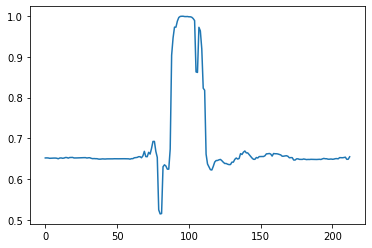

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(dump_var))],dump_var)


In [ ]:
min(dump_var)

0.46014785602974145

[0.9999089938931733,
 0.99991900908126,
 0.9999211748191192,
 0.9998214530824794,
 0.9997916998899836,
 0.9997988418567932,
 0.999760544067941,
 0.9997274870387465,
 0.9997676748807894,
 0.9995336221708728,
 0.9998600049623362,
 0.9998406786709491,
 0.9996011992737576,
 0.9995159196903965,
 0.9997567578674761,
 0.9997599450042775,
 0.9994062860065385,
 0.9993805236474683,
 0.9993810621549553,
 0.9994649913466048,
 0.9995825350583314,
 0.9995828888630959,
 0.9995841177187978,
 0.9994921862733671,
 0.9994932903772124,
 0.9994968412936378,
 0.9994970385246837,
 0.999493429828333,
 0.9994897807417145,
 0.9995831308270015,
 0.9995653777328185,
 0.9995631747420378,
 0.9995650955337897,
 0.9996646655842706,
 0.9997124371576509,
 0.9996469895367321,
 0.9996475178393943,
 0.9997497999139743,
 0.9996892810435055,
 0.9997118447705615,
 0.9997212169101246,
 0.9997192298685451,
 0.9997852529560683,
 0.9997269178505609,
 0.9997856524515588,
 0.9997780802411119,
 0.9997687548187558,
 0.99978554323684